In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df= pd.read_csv('Classified Data',index_col=0)

In [6]:
df.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns= df.columns[:-1])

In [18]:
from sklearn.cross_validation import train_test_split

In [23]:
X= df_feat
y= df['TARGET CLASS']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn= KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
pred= knn.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


In [53]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
print(error_rate)

[0.07666666666666666, 0.09, 0.05, 0.07, 0.056666666666666664, 0.05, 0.06666666666666667, 0.06, 0.05, 0.056666666666666664, 0.05333333333333334, 0.04666666666666667, 0.05, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.04666666666666667, 0.05, 0.05333333333333334, 0.05, 0.05, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.04666666666666667, 0.06, 0.05, 0.056666666666666664, 0.04666666666666667, 0.05333333333333334, 0.043333333333333335, 0.04666666666666667, 0.043333333333333335, 0.04666666666666667, 0.043333333333333335, 0.05]


In [54]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0,0.5,'Error, Rate')

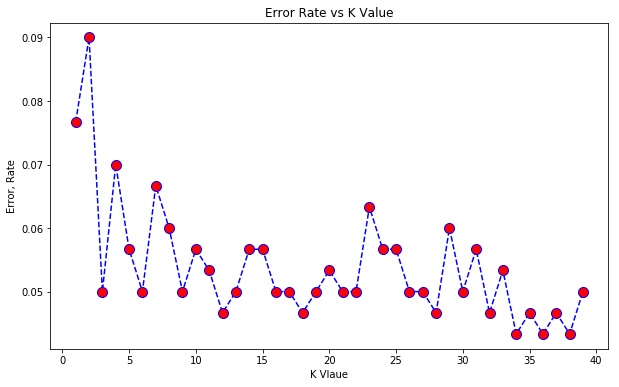

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Vlaue')
/ plt.ylabel('Error Rate')

In [56]:
knn= KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
pred= knn.predict(X_test)

print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       159
          1       0.96      0.95      0.95       141

avg / total       0.96      0.96      0.96       300



[[153   6]
 [  7 134]]
